# SAD

In [22]:
import sounddevice as sd
import numpy as np
import time
from tqdm import tqdm
import threading
from scipy import signal
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
import random
from PyDMXControl.controllers import OpenDMXController
from PyDMXControl.profiles.Generic import Dimmer, Custom
import mido
%matplotlib inline

In [25]:
# use mido to list available ports
mido.get_input_names()

['Keystation 49 MK3 (USB MIDI)', 'Keystation 49 MK3 (Transport)']

In [31]:
# open a port for the keystation 49 MK3
port = mido.open_input('Keystation 49 MK3 (USB MIDI)')

In [34]:
# print out the messages from the port
while True:
    for msg in port.iter_pending():
        print(msg.note)


53
53
53
67
67


KeyboardInterrupt: 

In [3]:
dmx = OpenDMXController()
speed = dmx.add_fixture(Dimmer(start_channel=1))
intensity = dmx.add_fixture(Dimmer(start_channel=2))

In [4]:
intensity.dim(255)

In [6]:
# find the black hole
audio_devices = sd.query_devices()
for device in audio_devices:
    if device['name'] == 'BlackHole 16ch':
        device_index = device['index']
print(f'Using: {audio_devices[device_index]["name"]}')

Using: BlackHole 16ch


In [24]:
def calculate_fundamental_frequency(signal, sample_rate):
    # Perform Fourier Transform
    fft_result = np.fft.fft(signal)
    
    # Frequency axis
    freqs = np.fft.fftfreq(len(signal), 1/sample_rate)
    
    # Find the index of the peak frequency (excluding DC component)
    peak_index = np.argmax(np.abs(fft_result[1:len(fft_result)//2]))
    
    # Calculate fundamental frequency
    fundamental_freq = freqs[peak_index + 1]
    
    return abs(fundamental_freq)

In [44]:
msgs = []
while True:
    for msg in port.iter_pending():
        msgs.append(msg.note)

KeyboardInterrupt: 

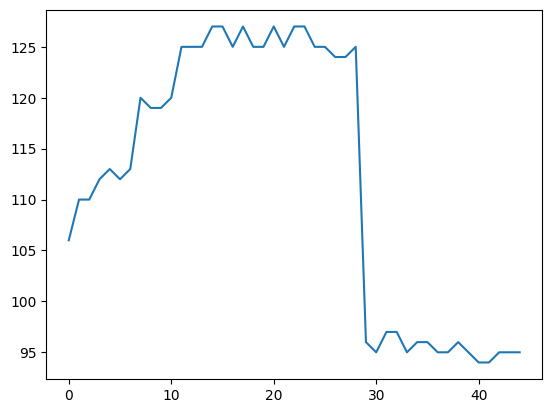

/Users/f004swn/anaconda3/envs/spotify/lib/python3.11/site-packages/PyDMXControl/utils/timing/_Ticker.py:79: UserWarning: Ticker loop behind by 23.861165364583332ms, took 40.52783203125ms
  warn("Ticker loop behind by {:,}ms, took {:,}ms".format(-wait_dur, loop_dur))


: 

In [45]:
plt.plot(msgs)

In [42]:
SAMPLERATE = 16000
# set the blocksize to 20Hz
MINIMUM_FREQUENCY = 20
BLOCKSIZE = int(round(SAMPLERATE/MINIMUM_FREQUENCY))

# the frequency range for the bass
BASS_RANGE = [20, 200]
MID_RANGE = [350, 2000]
HIGH_RANGE = [1500, 20000]

BASS_MAX = 35
BASS_MAX_THRESHOLD = 10
BASS_MIN_THRESHOLD = 5
INTER_BRIGHTNESS = 50

MIN_BASS_BRIGHTNESS = 20

BASS_POWER_RANGE = BASS_MAX_THRESHOLD - BASS_MIN_THRESHOLD
BASS_BRIGHTNESS_RANGE = 255 - MIN_BASS_BRIGHTNESS

def get_bass_brightness(bass_power):
    return int(MIN_BASS_BRIGHTNESS + (bass_power - BASS_MIN_THRESHOLD) * (BASS_BRIGHTNESS_RANGE / BASS_POWER_RANGE))

HIGH_THRESH = 1

global spectra
spectra = []
ffs = []
mappings = []
rmss = []

def light_sound(indata, outdata, frames, time, status=None):
    power_spectrum = np.abs(np.fft.rfft(np.sum(indata[:, :2], axis=1), n=BLOCKSIZE))
    # get rms volume
    rms = np.sqrt(np.mean(np.square(indata)))
    mapping = 11 - np.argmax(power_spectrum[:10])
    val = int(mapping+235)
    try:
        msg = [i for i in port.iter_pending()][0].note
    except:
        msg = None

    print(msg)
    
    # convert msg to speed
    if msg is not None:
        speed.dim(msg)
    else:
        speed.dim(0)


with sd.InputStream(callback=light_sound, device=device_index, channels=1, samplerate=16000, blocksize=BLOCKSIZE):
    while True:
        continue


None
None
None
None
None
None
None
None
None
103
None
105
103
None
103
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
105
None
105
105
105
None
105
None
105
105
105
None
105
None
105
None
105
105
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
107
107
None
107
107
None
107
107
None
107
107
107
None
107
None
107
107
None
107
107
None
None
None
None
None
None
None
None
None
None
None
None
None
107
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

KeyboardInterrupt: 

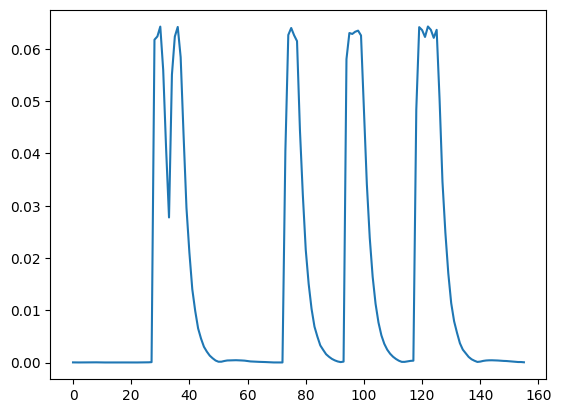

In [9]:
plt.plot(rmss)

In [23]:
speed.dim(0)


In [49]:
# make a dict of RGB colors to their DMX values
# this is the color wheel
# something nice about this is that if you want to make a color, you can just average the values of the colors you want to mix

colors = {
    'red': [255, 0, 0],
    'orange': [255, 127, 0],
    'yellow': [255, 255, 0],
    'green': [0, 255, 0],
    'blue': [0, 0, 255],
    'purple': [75, 0, 130],
    'pink': [255, 0, 255],
    'white': [255, 255, 255]
}

def random_color():
    """
    Returns a random color from the color wheel
    """
    return np.random.choice(list(colors.keys()))

def RGB(brightness=255, color='pink', strobe=False, strobe_speed=255):
    """
    Returns the list of 7 DMX values for the RGB light
    """
    if strobe:
        strobe_val = 255
    else:
        strobe_val = 0
    return [brightness, colors[color][0], colors[color][1], colors[color][2], strobe_val, 0, 0]

In [51]:
# set all RGBS to blue
for rg in rgb:
    rg.set_channels(RGB(color='green', strobe=False))

In [52]:
def get_bass_brightness(bass_power):
    return int(MIN_BASS_BRIGHTNESS + (bass_power - BASS_MIN_THRESHOLD) * (BASS_BRIGHTNESS_RANGE / BASS_POWER_RANGE))

def freq_to_index(freq):
    return int(round(freq * BLOCKSIZE / SAMPLERATE))

In [53]:
# make the template scene dict
SCENE_TEMPLATE = {
    'BASS_RANGE': [20, 500], # frequency range for bass
    'BASS_MAX': 35, # maximum bass power
    'BASS_MAX_THRESHOLD': 20, # bass power that will trigger the scene
    'BASS_MIN_THRESHOLD': 2, # bass power that will trigger the scene
    'MIN_BASS_BRIGHTNESS': 0, # minimum brightness that will be reached
    'MAX_BASS_BRIGHTNESS': 75, # maximum brightness that will be reached
    'BASS_MAP': rgb, # light that bass controls
    'MID_RANGE': [350, 2000], # frequency range for mid
    'MID_THRESH': 0.03, # mid power that will trigger the scene
    'HIGH_RANGE': [2000, 16000], # frequency range for high hat
    'HIGH_THRESH': 1, # high hat power that will trigger the scene
    'HIGH_MAP': party['strobe_intensity'], # light that high hat controls (usually strobe)
    'STROBE_ENABLED': True, # whether the strobe will be enabled
    'STROBE_SPEED': 255, # speed of the strobe
    'DISCOBALL_ENABLED': True, # whether the discoball lights will be enabled
    'LASERS_ENABLED': True, # whether the lasers will be enabled
    'LAMP_ENABLED': True, # whether the lamp will be enabled
    'RGB_ENABLED': True, # whether the RGB lights will be enabled
    'RGB_MAX': 255, # maximum brightness of the RGB lights
    'RGB_MIN': 0, # minimum brightness of the RGB lights
    'RGB_THRESH': 1, # threshold for the RGB lights
    'RGB_MODE': 0, # mode of the RGB lights (0 is monochrome, 1 is reactive)
    'RGB_COLOR': 'pink', # color of the RGB lights (if monochrome)
    'RGB_STROBE_TRIGGER': 1, # threshold for the RGB lights to strobe
    'RGB_STROBE_SPEED': 255, # speed of the RGB lights when they strobe
    'RGB_STROBE_INTENSITY': 255, # intensity of the RGB lights when they strobe
    'RGB_STROBE_ENABLED': False, # whether the RGB lights will strobe
    'RGB_STROBE_MODE': 0 # mode of the RGB lights when they strobe (0 is monochrome, 1 is reactive)
}

In [87]:
# make the template scene dict
SAD = {
    'BASS_RANGE': [20, 500], # frequency range for bass
    'BASS_MAX': 35, # maximum bass power
    'BASS_MAX_THRESHOLD': 10, # bass power that will trigger the scene
    'BASS_MIN_THRESHOLD': 2, # bass power that will trigger the scene
    'MIN_BASS_BRIGHTNESS': 0, # minimum brightness that will be reached
    'MAX_BASS_BRIGHTNESS': 75, # maximum brightness that will be reached
    'BASS_MAP': rgb, # light that bass controls
    'MID_RANGE': [350, 2000], # frequency range for mid
    'MID_THRESH': 0.03, # mid power that will trigger the scene
    'HIGH_RANGE': [2000, 16000], # frequency range for high hat
    'HIGH_THRESH': 1.2, # high hat power that will trigger the scene
    'HIGH_MAP': party['strobe_intensity'], # light that high hat controls (usually strobe)
    'STROBE_ENABLED': True, # whether the strobe will be enabled
    'STROBE_SPEED': 255, # speed of the strobe
    'DISCOBALL_ENABLED': True, # whether the discoball lights will be enabled
    'LASERS_ENABLED': True, # whether the lasers will be enabled
    'LAMP_ENABLED': True, # whether the lamp will be enabled
    'RGB_ENABLED': True, # whether the RGB lights will be enabled
    'RGB_MAX': 255, # maximum brightness of the RGB lights
    'RGB_MIN': 0, # minimum brightness of the RGB lights
    'RGB_THRESH': 500, # threshold for the RGB lights
    'RGB_MODE': 1, # mode of the RGB lights (0 is monochrome, 1 is reactive)
    'RGB_COLOR': 'pink', # color of the RGB lights (if monochrome)
    'RGB_STROBE_TRIGGER': 1, # threshold for the RGB lights to strobe
    'RGB_STROBE_SPEED': 255, # speed of the RGB lights when they strobe
    'RGB_STROBE_INTENSITY': 255, # intensity of the RGB lights when they strobe
    'RGB_STROBE_ENABLED': True, # whether the RGB lights will strobe
    'RGB_STROBE_MODE': 1 # mode of the RGB lights when they strobe (0 is monochrome, 1 is reactive)
}

In [90]:
# just make a function that makes a function (nested func) and then give that output to the callback
# so it would be like with sd.InputStream(callback=light_sound(scene_dict), device=3, channels=16, samplerate=16000, blocksize=blocksize)

def scene(scene_dict_template):
    """
    Takes a scene dict, sets the lights to the init parameters, and returns a callback function to give to the 
    light controller thread.

    scene_dict is a dictionary that has the following keys:
    'BASS_RANGE': a list of two integers that are the start and end of the bass range
    'BASS_MAX': the maximum bass power that will be reached
    'BASS_MAX_THRESHOLD': the bass power that will trigger the scene
    'BASS_MIN_THRESHOLD': the bass power that will trigger the scene
    'MIN_BASS_BRIGHTNESS': the minimum brightness that will be reached
    'MAX_BASS_BRIGHTNESS': the maximum brightness that will be reached
    'BASS_MAP': the light that bass controls
    'HIGH_RANGE': a list of two integers that are the start and end of the high hat range
    'HIGH_THRESH': the high hat power that will trigger the scene
    'HIGH_MAP': the light that high hat controls (usually strobe)
    'STROBE_ENABLED': a boolean that determines whether the strobe will be enabled
    'STROBE_SPEED': the speed of the strobe
    'DISCOBALL_ENABLED': a boolean that determines whether the discoball lights will be enabled
    'LASERS_ENABLED': a boolean that determines whether the lasers will be enabled
    'LAMP_ENABLED': a boolean that determines whether the lamp will be enabled
    'RGB_ENABLED': a boolean that determines whether the RGB lights will be enabled
    'RGB_MAP': a list of integers that map the RGB lights to the frequency bins
    'RGB_MAX': the maximum brightness of the RGB lights
    'RGB_MIN': the minimum brightness of the RGB lights
    'RGB_THRESH': the threshold for the RGB lights
    'RGB_MODE': the mode of the RGB lights (0 is monochrome, 1 is reactive)
    'RGB_COLOR': the color of the RGB lights (if monochrome)
    'RGB_STROBE_TRIGGER': the threshold for the RGB lights to strobe
    'RGB_STROBE_SPEED': the speed of the RGB lights when they strobe
    'RGB_STROBE_INTENSITY': the intensity of the RGB lights when they strobe
    'RGB_STROBE_ENABLED': a boolean that determines whether the RGB lights will strobe
    'RGB_STROBE_MODE': the mode of the RGB lights when they strobe (0 is monochrome, 1 is reactive)
    """
    scene_dict = scene_dict_template.copy()

    # get the rgb keys that exist in party
    rgb_lights = []
    for key in party.keys():
        if 'rgb' in key:
            rgb_lights.append(party[key])
    
    # init strobe to 0 always
    party['strobe_intensity'].dim(0)
    party['strobe_speed'].dim(0)

    if scene_dict['RGB_ENABLED']:
        if scene_dict['RGB_MODE'] == 0:
            for i in rgb_lights:
                i.set_channels(RGB(brightness=scene_dict['RGB_MAX'], color=scene_dict['RGB_COLOR']))
        elif scene_dict['RGB_MODE'] == 1:
            # do the reactive thing
            # (just set to dim pink for now)
            for i in rgb_lights:
                i.set_channels(RGB(brightness=scene_dict['RGB_MAX'], color='pink'))
    else:
        for i in rgb_lights:
            i.set_channels(RGB(brightness=0))


    def get_dmx_value(bass_power, scene_dict):
        BASS_BRIGHTNESS_RANGE = scene_dict['MAX_BASS_BRIGHTNESS'] - scene_dict['MIN_BASS_BRIGHTNESS']
        BASS_POWER_RANGE = scene_dict['BASS_MAX_THRESHOLD'] - scene_dict['BASS_MIN_THRESHOLD']
        dmx_value = int(scene_dict['MIN_BASS_BRIGHTNESS'] + (bass_power - scene_dict['BASS_MIN_THRESHOLD']) * (BASS_BRIGHTNESS_RANGE / BASS_POWER_RANGE))
        return dmx_value

    def get_bass_brightness(bass_power):
        return int(scene_dict['MIN_BASS_BRIGHTNESS'] + (bass_power - scene_dict['BASS_MIN_THRESHOLD']) * (BASS_BRIGHTNESS_RANGE / BASS_POWER_RANGE))

    # turn all the frequency bins into indices
    scene_dict['BASS_RANGE'] = [freq_to_index(scene_dict['BASS_RANGE'][0]), freq_to_index(scene_dict['BASS_RANGE'][1])]
    scene_dict['HIGH_RANGE'] = [freq_to_index(scene_dict['HIGH_RANGE'][0]), freq_to_index(scene_dict['HIGH_RANGE'][1])]
    
    # check if anything is mapped to the strobe:
    strobe_maps = []
    for par, val in scene_dict.items():
        if party['strobe_intensity'] == val:
            strobe_maps.append(par)
    # if not scene_dict['STROBE_ENABLED'] and (len(strobe_maps) > 0):
    #     print('Warning: strobe is not enabled but is mapped to a parameter. Strobe will not be enabled.')
    #     for par in strobe_maps:
    #         scene_dict[par] = None
    

    # now do the callback
    def out_scene(indata, outdata, frames, time, status=None):
        power_spectrum = np.abs(np.fft.rfft(np.sum(indata, axis=1), n=None))
        # get the average power in the bass range
        bass_power = np.mean(power_spectrum[scene_dict['BASS_RANGE'][0]:scene_dict['BASS_RANGE'][1]])
        # get the average power in the mid range
        mid_power = np.mean(power_spectrum[scene_dict['MID_RANGE'][0]:scene_dict['MID_RANGE'][1]])
        # get the average power in the high hat range
        high_hat_power = np.mean(power_spectrum[scene_dict['HIGH_RANGE'][0]:scene_dict['HIGH_RANGE'][1]])
        # get the total power
        total_power = np.sum(power_spectrum)
        #print(bass_power, mid_power, high_hat_power, total_power)

        # # set the bass light
        # if isinstance(scene_dict['BASS_MAP'], list):
        #     for i in scene_dict['BASS_MAP']:
        #         #i.set_channels(RGB(brightness=get_dmx_value(bass_power, scene_dict), color=random_color()), strobe=True)
        # #else:
        #         if bass_power > scene_dict['BASS_MAX']:
        #             i.set_channels(RGB(brightness=255, color=random_color()), strobe=True)
        #         elif bass_power < scene_dict['BASS_MIN_THRESHOLD']:
        #             i.set_channels(RGB(brightness=scene_dict['MIN_BASS_BRIGHTNESS'], color='pink'), strobe=True)
        #         else:
        #             # map between min bass brightness and max bass brightness
        #             i.set_channels(RGB(brightness=get_dmx_value(bass_power, scene_dict), color='pink'), strobe=True)

        # set the high hat light
        if high_hat_power > scene_dict['HIGH_THRESH']:
            scene_dict['HIGH_MAP'].dim(255)
        elif high_hat_power < scene_dict['HIGH_THRESH']:
            scene_dict['HIGH_MAP'].dim(0)

        #set the RGB lights
        if scene_dict['RGB_ENABLED']:
            if scene_dict['RGB_MODE'] == 1:
                # reactive
                if total_power > scene_dict['RGB_THRESH']:
                    for i in rgb_lights:
                        i.set_channels(RGB(brightness=scene_dict['RGB_MAX'], color=random_color(), strobe=True))
                else:
                    for i in rgb_lights:
                        i.set_channels(RGB(brightness=10, color='pink'), strobe=False)

        # set the strobe
        if scene_dict['STROBE_ENABLED']:
            if high_hat_power > scene_dict['HIGH_THRESH']:
                party['strobe_intensity'].dim(255)
                party['strobe_speed'].dim(255)
            elif high_hat_power < scene_dict['HIGH_THRESH']:
                party['strobe_intensity'].dim(0)
                party['strobe_speed'].dim(0)

    return out_scene

In [91]:
test_scene_callback = scene(SAD)
with sd.InputStream(callback=test_scene_callback, device=device_index, channels=1, samplerate=16000, blocksize=BLOCKSIZE):
    while True:
        continue

/Users/f004swn/anaconda3/envs/spotify/lib/python3.11/site-packages/PyDMXControl/utils/timing/_Ticker.py:79: UserWarning: Ticker loop behind by 2.922200520833332ms, took 19.5888671875ms
  warn("Ticker loop behind by {:,}ms, took {:,}ms".format(-wait_dur, loop_dur))
/Users/f004swn/anaconda3/envs/spotify/lib/python3.11/site-packages/PyDMXControl/utils/timing/_Ticker.py:79: UserWarning: Ticker loop behind by 12.721516927083332ms, took 29.38818359375ms
  warn("Ticker loop behind by {:,}ms, took {:,}ms".format(-wait_dur, loop_dur))
/Users/f004swn/anaconda3/envs/spotify/lib/python3.11/site-packages/PyDMXControl/utils/timing/_Ticker.py:79: UserWarning: Ticker loop behind by 4.624348958333332ms, took 21.291015625ms
  warn("Ticker loop behind by {:,}ms, took {:,}ms".format(-wait_dur, loop_dur))
/Users/f004swn/anaconda3/envs/spotify/lib/python3.11/site-packages/PyDMXControl/utils/timing/_Ticker.py:79: UserWarning: Ticker loop behind by 10.496419270833332ms, took 27.1630859375ms
  warn("Ticker loo

: 

In [41]:
# warm (for nice acoustic songs)
warm = SCENE_TEMPLATE.copy()
warm['RGB_ENABLED'] = False
warm['STROBE_ENABLED'] = False
warm['BASS_RANGE'] = [20, 1000]
warm['MIN_BASS_BRIGHTNESS'] = 50
warm['MAX_BASS_BRIGHTNESS'] = 150
warm['BASS_MAX_THRESHOLD'] = 25
warm['LASERS_ENABLED'] = False
warm['DISCOBALL_ENABLED'] = False

# hip-hop
hiphop = SCENE_TEMPLATE.copy()
hiphop['BASS_RANGE'] = [20, 500]
hiphop['DISCOBALL_ENABLED'] = True
hiphop['LAMP_ENABLED'] = False
hiphop['BASS_MAX_THRESHOLD'] = 15
hiphop['MAX_BASS_BRIGHTNESS'] = 50
hiphop['MIN_BASS_BRIGHTNESS'] = 0
hiphop['HIGH_THRESH'] = 0.5
hiphop['RGB_COLOR'] = 'red'
hiphop['LASERS_ENABLED'] = True


# dubstep
dubstep = SCENE_TEMPLATE.copy()
dubstep['BASS_RANGE'] = [20, 200]
dubstep['BASS_MAX'] = 100
dubstep['BASS_MAX_THRESHOLD'] = 50
dubstep['BASS_MIN_THRESHOLD'] = 5
dubstep['MIN_BASS_BRIGHTNESS'] = 20
dubstep['MAX_BASS_BRIGHTNESS'] = 100
dubstep['RGB_ENABLED'] = True
dubstep['RGB_MODE'] = 1
dubstep['RGB_THRESH'] = 1
dubstep['RGB_COLOR'] = 'blue'
dubstep['RGB_STROBE_ENABLED'] = True
dubstep['RGB_STROBE_MODE'] = 1
dubstep['RGB_STROBE_TRIGGER'] = 1
dubstep['RGB_STROBE_SPEED'] = 255
dubstep['RGB_STROBE_INTENSITY'] = 255
dubstep['STROBE_ENABLED'] = True
dubstep['STROBE_SPEED'] = 255
dubstep['DISCOBALL_ENABLED'] = False
dubstep['LAMP_ENABLED'] = False

# goosebumps
goosebumps = SCENE_TEMPLATE.copy()
goosebumps['RGB_MODE'] = 0
goosebumps['RGB_COLOR'] = 'green'
goosebumps['MIN_BASS_BRIGHTNESS'], goosebumps['MAX_BASS_BRIGHTNESS'] = 0, 0
goosebumps['LASERS_ENABLED'] = True
goosebumps['DISCOBALL_ENABLED'] = False
goosebumps['BASS_MAP'] = party['rgb1']



In [44]:
test_scene_callback = scene(SAD)
with sd.InputStream(callback=test_scene_callback, device=device_index, channels=1, samplerate=16000, blocksize=BLOCKSIZE):
    while True:
        continue

KeyboardInterrupt: 

In [43]:
test_scene_callback = scene(dubstep)
with sd.InputStream(callback=test_scene_callback, device=device_index, channels=1, samplerate=16000, blocksize=BLOCKSIZE):
    while True:
        continue

KeyboardInterrupt: 

In [17]:
# set the last RGB to blue
party['rgb4'].set_channels(RGB(color='blue'))

In [18]:
def allstrobe(length='inf', color='random'):
    """
    Strobes all the lights for a given length of time
    """
    if length == 'inf':
        party['strobe_intensity'].dim(255)
        party['strobe_speed'].dim(255)
        for i in rgb:
            if color == 'random':
                i.set_channels(RGB(strobe=True, color=random_color()))
            else:
                i.set_channels(RGB(strobe=True, color=color))

    else:
        start = time.time()
        party['strobe_intensity'].dim(255)
        party['strobe_speed'].dim(255)
        while time.time() - start < length:
            for i in rgb:
                if color == 'random':
                    i.set_channels(RGB(strobe=True, color=random_color()))
                else:
                    i.set_channels(RGB(strobe=True, color=color))
            time.sleep(0.1)
        party['strobe_intensity'].dim(0)
        party['strobe_speed'].dim(0)
        for i in rgb:
            i.set_channels([0, 0, 0, 0, 0, 0, 0])

In [19]:
allstrobe(length=5, color='random')

TypeError: 'Custom' object is not iterable

In [27]:
# turn all off
for key in party:
    if 'rgb' in key:
        party[key].set_channels(RGB(brightness=0))
    else:
        party[key].dim(0)